In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

def quick_eda(df):
    # Plot class distribution
    fig, ax = plt.subplots()
    sns.countplot(data=df, x='Target', palette='Set2', ax=ax)
    ax.set_title("Target Class Distribution (Up = 1, Down = 0)")
    ax.set_xlabel("Target")
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Optional: Display indicator correlations
    numeric_cols = df.select_dtypes(include='number').drop(columns=['Target'], errors='ignore')
    corr = numeric_cols.corrwith(df['Target']).sort_values(ascending=False)

    print("\n🔍 Correlation of Features with Target:")
    print(corr.head(10).round(3))


C:\Users\alpya\AppData\Local\Temp\ipykernel_12132\1692430065.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\alpya\AppData\Local\Temp\ipykernel_12132\2707247893.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='Set2', ax=ax)


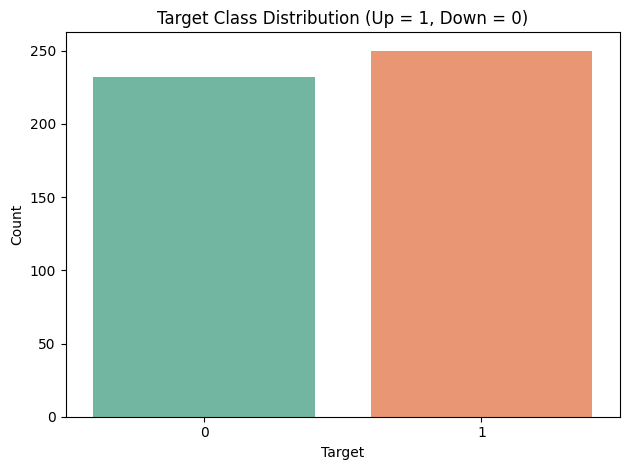


🔍 Correlation of Features with Target:
Price                  Ticker
Volume                 AAPL      0.008
Bollinger_Bands_Lower           -0.033
Bollinger_Bands_Upper           -0.039
EMA_14                          -0.045
SMA_14                          -0.046
RSI_14                          -0.057
Close                  AAPL     -0.061
Low                    AAPL     -0.061
High                   AAPL     -0.064
Open                   AAPL     -0.065
dtype: float64


In [4]:
from scripts.fetch_data import add_technical_indicators, add_target_label, clean_features_for_modeling
import yfinance as yf
df = yf.download("AAPL", start="2022-01-01", end="2023-12-31")

df = add_technical_indicators(df)
df = add_target_label(df)
df = clean_features_for_modeling(df)

quick_eda(df)